<a href="https://colab.research.google.com/github/Ruran8wa/math-ml-summative/blob/main/predicting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Student_performance_data _.csv")

print(df.head)
print(df.info())
print(df.isnull().sum())

<bound method NDFrame.head of       StudentID  Age  Gender  Ethnicity  ...  Music  Volunteering       GPA  GradeClass
0          1001   17       1          0  ...      1             0  2.929196         2.0
1          1002   18       0          0  ...      0             0  3.042915         1.0
2          1003   15       0          2  ...      0             0  0.112602         4.0
3          1004   17       1          0  ...      0             0  2.054218         3.0
4          1005   17       1          0  ...      0             0  1.288061         4.0
...         ...  ...     ...        ...  ...    ...           ...       ...         ...
2387       3388   18       1          0  ...      0             0  3.455509         0.0
2388       3389   17       0          0  ...      0             0  3.279150         4.0
2389       3390   16       1          0  ...      0             1  1.142333         2.0
2390       3391   16       1          1  ...      1             0  1.803297         1.0
23

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(columns=['StudentID'])

In [ ]:
X = df.drop(columns=['GPA', 'GradeClass'])
Y = df['GPA']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [ ]:
train_mse = mean_squared_error(Y_train ,y_train_pred)
test_mse = mean_squared_error(Y_test ,y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0385
Test MSE: 0.0394


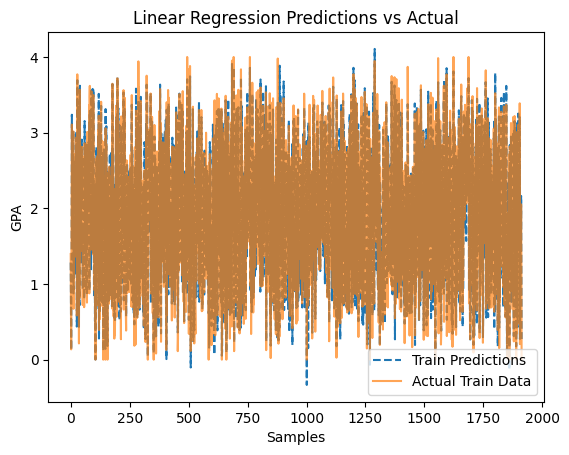

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(len(y_train_pred))
plt.plot(epochs, y_train_pred[:len(epochs)], label='Train Predictions', linestyle='dashed')
plt.plot(epochs, Y_train[:len(epochs)], label='Actual Train Data', alpha=0.7)
plt.xlabel("Samples")
plt.ylabel("GPA")
plt.title("Linear Regression Predictions vs Actual")
plt.legend()
plt.show()

In [ ]:
def gradient_descent(X, y, lr=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0
    loss_train = []
    loss_test = []

    for i in range(epochs):
        y_pred = X.dot(theta) + bias
        error = y_pred - y

        d_theta = (1/m) * X.T.dot(error)
        d_bias = (1/m) * np.sum(error)

        theta -= lr * d_theta
        bias -= lr * d_bias

        train_mse = np.mean(error**2)
        test_mse = np.mean((X_test.dot(theta) + bias - Y_test)**2)

        loss_train.append(train_mse)
        loss_test.append(test_mse)

    return theta, bias, loss_train, loss_test

In [ ]:
lr = 0.01
epochs = 100
_, _, loss_train, loss_test = gradient_descent(X_train, Y_train, lr, epochs)

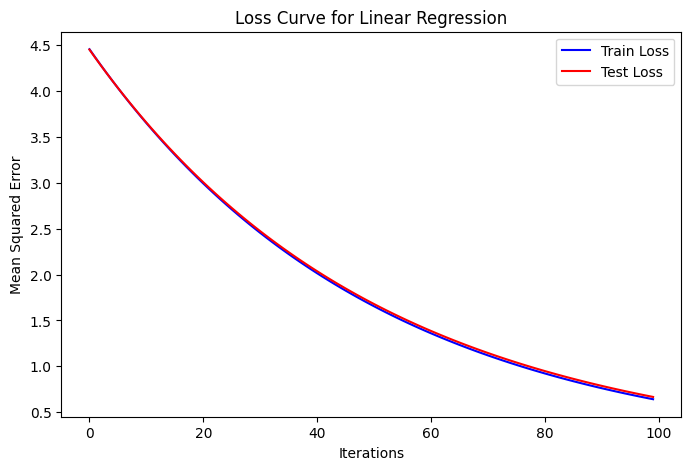

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_train, label='Train Loss', color='blue')
plt.plot(range(epochs), loss_test, label='Test Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

In [ ]:
Y_train_pred_dt = dt_model.predict(X_train)
Y_test_pred_dt = dt_model.predict(X_test)

Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)

In [ ]:
mse_train_dt = mean_squared_error(Y_train, Y_train_pred_dt)
mse_test_dt = mean_squared_error(Y_test, Y_test_pred_dt)

mse_train_rf = mean_squared_error(Y_train, Y_train_pred_rf)
mse_test_rf = mean_squared_error(Y_test, Y_test_pred_rf)

In [ ]:
print(f"Decision Tree - Train MSE: {mse_train_dt:.4f}, Test MSE: {mse_test_dt:.4f}")
print(f"Random Forest - Train MSE: {mse_train_rf:.4f}, Test MSE: {mse_test_rf:.4f}")

Decision Tree - Train MSE: 0.0000, Test MSE: 0.1157
Random Forest - Train MSE: 0.0081, Test MSE: 0.0616


In [ ]:
import joblib

joblib.dump(lr_model, "best_model.pkl")
print("saved successfully!")


saved successfully!
